In [ ]:
#import libraries
!pip install pycaret
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 1.3 MB 42.2 MB/s 
     |████████████████████████████████| 268 kB 64.1 MB/s 
     |████████████████████████████████| 3.3 MB 25.2 MB/s 
     |████████████████████████████████| 134 kB 68.7 MB/s 
     |████████████████████████████████| 1.7 MB 62.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 17.0 MB 148 kB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 6.8 MB 21.5 MB/s 
     |████████████████████████████████| 10.4 MB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 42.9 MB/s 
     |████████████████████████████████| 636 kB 52.1 MB/s 
     |████████████████████████████████|

In [ ]:
import scikitplot as skplt

In [ ]:
import pandas as pd

In [ ]:
parkinson_data = pd.read_csv('/content/parkinsons(2).csv')

In [ ]:
parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
parkinson_data.shape

(195, 24)

In [ ]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
parkinson_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
parkinson_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
X = parkinson_data.drop(columns=['name', 'status',], axis=1)
Y = parkinson_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
from sklearn.preprocessing  import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score


In [ ]:
model = svm.SVC(kernel = 'linear')

In [ ]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  0.8846153846153846


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy score of the test data:  0.8717948717948718


In [ ]:
import numpy as np


In [ ]:
input_data = (245.51000,262.09000,231.84800,0.00235,0.000010,0.00127,0.00148,0.00380,0.01608,0.14100,0.00906,0.00977,0.01149,0.02719,0.00476,24.60200,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')


[0]
The person does not have Parkinsons Disease


In [ ]:
ax = sns.countplot(x='status', data=parkinson_data)

NameError: ignored

In [ ]:
test_df = parkinson_data.sample(frac=0.1)
train_df = parkinson_data.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_df['set'] = 'test'
train_df['set'] = 'train'

In [ ]:
ax = sns.catplot(x='status', col='set', data=pd.concat([train_df, test_df]), kind='count', height=3)

NameError: ignored

In [ ]:
plt.show()

NameError: ignored

In [ ]:
print('Training dataset     :', len(train_df))


Training dataset     : 175


In [ ]:
print('Unseen data for validation    :', len(test_df))

Unseen data for validation    : 20


In [ ]:
pip install subzero

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 3.5 MB/s 
     |████████████████████████████████| 555 kB 9.2 MB/s 
     |████████████████████████████████| 244 kB 44.6 MB/s 


In [ ]:
!pip3 install commands

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement commands (from versions: none)
ERROR: No matching distribution found for commands


In [ ]:
from subzero import setup

ModuleNotFoundError: ignored

In [ ]:
from setuptools import Extension
from subzero import Executable, setup


ModuleNotFoundError: ignored

In [ ]:
clf1 = setup(data = train_df, target = 'status', ignore_features = ['name'], fix_imbalance=True, session_id=123, silent = True)

NameError: ignored

In [ ]:
filename = 'parkinsons(2).csv'

In [ ]:
data = readtable(filename, 'TextType', 'string')

NameError: ignored

In [ ]:
from keras.layers import Input

In [ ]:
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import batch_normalization
from keras.datasets import mnist

In [ ]:
from keras import optimizers
from tensorflow.keras.optimizers import Adam


In [ ]:
from keras import backend as K

In [ ]:
from keras import initializers
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D

In [ ]:
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
par = pd.read_csv('parkinsons(2).csv')

In [ ]:
par.shape

(195, 24)

In [ ]:
n_patients = par.shape[0]
n_features = par.shape [1]-1

In [ ]:
n_parkinsons = par[par['status']== 1].shape[0]
n_healthy = par[par['status'] == 0].shape[0]

In [ ]:
print('total number of patients:', n_patients)
print('number of features:', n_features)
print('number of patients with parkinson:', n_parkinsons)
print('number of patients without parkinsons:', n_healthy)

total number of patients: 195
number of features: 23
number of patients with parkinson: 147
number of patients without parkinsons: 48


In [ ]:
X = list(par.columns[1:17]) + list(par.columns[18:])
Y = par.columns[17]

In [ ]:
par.columns[0]

'name'

In [ ]:
Xf =par[X]
Yf = par[Y]

In [ ]:
Yf

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [ ]:
from sklearn.utils import class_weight

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=1)

In [ ]:
y_test = list(y_test)
y_train = list(y_train)
y_test[0]

1

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

AttributeError: ignored

In [ ]:
class_weights

array([2.34482759, 0.63551402])

In [ ]:
class_weight = {0: 3.,
                1: 1.}

In [ ]:
y_train

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
x_train.shape

(156, 22)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_normal = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
def build_network(input_features):
    inputs = Input(input_dim=input_features.shape[0], name="input")
    x = Dense(64, activation='relu', name='hidden1')
    x = Dense(32, activation='relu', name='hidden4')
    x = Dense(16, activation='relu', name='hidden5')
    prediction = Dense(1, activation= 'sigmoid', name='final')
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
input_features = x_train_normal.shape[1]

In [ ]:
x_train_normal.shape

(156, 22)

In [ ]:
model = build_network(input_features=input_features)

AttributeError: ignored

In [ ]:
model.summary()

AttributeError: ignored

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error



In [ ]:
features=par.loc[:, par.columns!='status'].values[:,1:]
labels=par.loc[:, 'status'].values

In [ ]:
from sklearn .preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
preprocess = StandardScaler()

In [ ]:
features = preprocess.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [ ]:
def build_classifier(optimizer='adam'):
  classifier = Sequential()
  classifier.add(Dense(units = 44, kernel_initializer= 'uniform', activation = 'relu', input_dim=22))
  classifier.add(Dense(units = 22, kernel_initializer= kernel_initializer = 'uniform', activation ='relu'))
  classifier.add(Dense(units = 1, kernel_initializer= 'uniform', activation= 'sigmoid'))
 classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
 return classifier

IndentationError: ignored

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Build our classifier
def build_classifier(optimizer='adam'):
    # Initialising the ANN
    classifier = Sequential()
    #adding the layers
    classifier.add(Dense(units = 44, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))
    classifier.add(Dense(units = 22, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    #compiling the clasifier
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 25, epochs = 500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
classifier2 = classifier.fit(X_train, y_train)

Epoch 1/500
7/7 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.7372
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.7564
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.7564
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.7564
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.7564
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5980 - accuracy: 0.7564
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.5606 - accuracy: 0.7692
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5246 - accuracy: 0.8013
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.8269
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.8462
Epoch 11/500
7/7 [===========

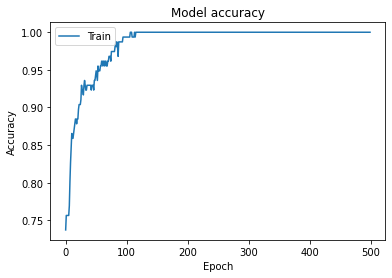

In [ ]:
plt.plot(classifier2.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

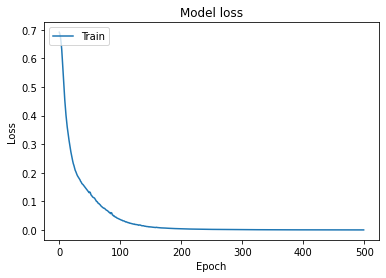

In [ ]:
plt.plot(classifier2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

In [ ]:
predicted = classifier.predict(X_test)
false_estimations=0
for i in range(predicted.size):
  if (predicted[i] != y_test[i]):
    false_estimations += 1
print('Our model was wrong %d times' % (false_estimations))


Our model was wrong 5 times


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39



In [ ]:
accuracy = accuracy_score(y_test, predicted)
print('Accuracy is: %.4f' % accuracy)
ce = keras.losses.binary_crossentropy(y_test, predicted)
mean_ce = np.mean(ce)
print ('Average Cross Entropy: %.3f nats' % (mean_ce/100))


Accuracy is: 0.8718


TypeError: ignored

In [ ]:
accuracy =accuracy_score(y_test,predicted)
print("Accuracy is: %.4f " % accuracy)
# calculate the average cross-entropy
ce = keras.losses.binary_crossentropy(y_test, predicted)
mean_ce = np.mean(ce)
print('Average Cross Entropy: %.3f nats' % (mean_ce/100))

Accuracy is: 0.8718 


TypeError: ignored

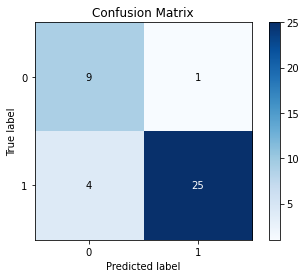

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predicted, normalize=False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

In [ ]:
scoring = 'roc_auc'
results = cross_val_scores(estimator = classifier, X=X_train, y = y_train, cv = 5, scoring=scoring)

NameError: ignored

In [ ]:
scoring = 'roc_auc'
results = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring=scoring)


Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.7177
Epoch 2/500
5/5 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.7339
Epoch 3/500
5/5 [==============================] - 0s 5ms/step - loss: 0.6831 - accuracy: 0.7339
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.7339
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.7339
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.7339
Epoch 7/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.7419
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5967 - accuracy: 0.7903
Epoch 9/500
5/5 [==============================] - 0s 6ms/step - loss: 0.5666 - accuracy: 0.7984
Epoch 10/500
5/5 [==============================] - 0s 5ms/step - loss: 0.5345 - accurac

AUC: 0.959 (0.041)


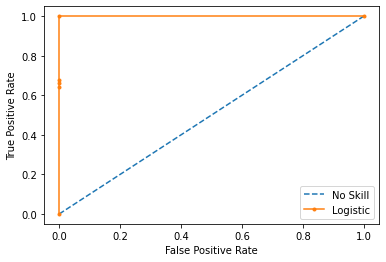

In [ ]:
print('AUC: %.3f' % results.mean(), '(%.3f)' %results.std())
yhat = classifier.predict_proba(X_train)
pos_probs = yhat[:, 1]
plt.plot([0, 1], [0, 1], linestyle='--', label = 'No Skill')
fpr, tpr, _ = roc_curve(y_train, pos_probs)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
def create_cnn_lstm():
  input = Input(shape=(224, 224,1))
  x = Conv2D(filters=64, kernel_size=2, strides=1, padding='same')(input)
  x = MaxPooling2D()(x)
  x = Conv2D(filters=64, kernel_size=3, strides=1, pedding='same')(x)
  x = MaxPooling2D()(x)
  x = Flattern()(x)
  x = Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.2))(x)
  output = Attention(dropout=0.3)(x)
  model = Model(inputs=input, outputs=output)
  return model

In [ ]:
from keras.layers import Embedding, Conv2D, MaxPooling1D, Flatten, Dense, LSTM, Dropout

In [ ]:
classifier = KerasClassifier(build_fn = create_cnn_lstm, batch_size = 25, epochs = 500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
 model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:

cnn_lstm = Sequential()
cnn_lstm.add(Embedding(input_dim = 128, output_dim = 100, input_length = 100))
cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(Conv1D(128, 3, activation = 'relu'))
cnn_lstm.add(MaxPooling1D(pool_size = 4))
cnn_lstm.add(LSTM(10))
cnn_lstm.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'sigmoid'))
optimizer = optimizers.RMSprop(lr = 0.0008, rho = 0.9, decay = 0.0)
cnn_lstm.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

NameError: ignored

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from numpy.testing import verbose
from xgboost.sklearn import XGBClassifier
model_7 = XGBClassifier()
model_7.fit(X_train, Y_train, verbose=True)
Y_pred= model_7.predict(X_test)
print(f1_score(Y_test, Y_pred)*100)

80.64516129032258


TypeError: ignored

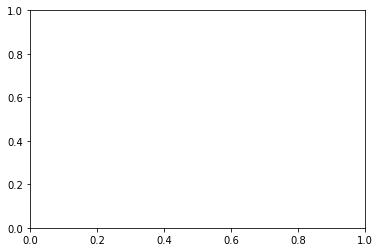

In [ ]:
plt.plot(model_7)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
from sklearn import svm

In [ ]:
model_4= svm.SVC()
model_4.fit(X_train, Y_train)
Y_pred = model_4.predict(X_test)
print(f1_score(Y_test, Y_pred)*100)


85.29411764705883


In [ ]:
import keras
from keras.layers import *


In [ ]:
model_6=keras.models.Sequential([
    Dense(512,input_dim = 22,activation='relu'),
    BatchNormalization(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_6.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               11776     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 128)             

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.00001)


AttributeError: ignored

In [ ]:
tf.keras.optimizers.Adam(learning_rate)

Epoch 1/20
5/5 [==============================] - 2s 70ms/step - loss: 0.8744 - accuracy: 0.5513 - val_loss: 0.6665 - val_accuracy: 0.7692
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 0.8530 - accuracy: 0.5192 - val_loss: 0.6911 - val_accuracy: 0.4872
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 0.8806 - accuracy: 0.5064 - val_loss: 0.7117 - val_accuracy: 0.3077
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.8535 - accuracy: 0.5064 - val_loss: 0.7308 - val_accuracy: 0.2564
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.8635 - accuracy: 0.5513 - val_loss: 0.7460 - val_accuracy: 0.2564
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.8640 - accuracy: 0.4744 - val_loss: 0.7611 - val_accuracy: 0.2564
Epoch 7/20
5/5 [==============================] - 0s 16ms/step - loss: 0.8077 - accuracy: 0.5256 - val_loss: 0.7752 - val_accuracy: 0.2564
Epoch 8/20
5/5 [===========